In [8]:
import pandas as pd
import numpy as np
import os 

In [9]:
os.getcwd()

'C:\\Users\\Dell\\PYTHON'

In [10]:
os.listdir()

['.ipynb_checkpoints',
 'auto_holtwinters_UDF.ipynb',
 'auto_holtwinters_UDF.py',
 'bankloan.sas7bdat',
 'Basic summary.xls',
 'Basics Of Python.ipynb',
 'Basic_summary.xls',
 'Car_sales.csv',
 'Churn_Modelling.csv',
 'Class exercise JAN batch.ipynb',
 'Clstr',
 'Clstr.csv',
 'CLUSTERING.ipynb',
 'Clus_data.xlsx',
 'corr.csv',
 'cust_data.xlsx',
 'Decomposition.csv',
 'desktop.ini',
 'EDA with pandas  2222.ipynb',
 'EDA with PANDAS.ipynb',
 'Groupby sum',
 'Groupby sum.xls',
 'heart.csv',
 'Logistic Reg.ipynb',
 'Logistic Regression.ipynb',
 'LogisticReg_on_bank.joblib',
 'Merging by sir.ipynb',
 'Merging.ipynb',
 'new.xlsx',
 'New_cust.csv',
 'Packages by sir.ipynb',
 'Packages.ipynb',
 'Profile_test.xlsx',
 'Profile_train.xlsx',
 'REGRESSION Analysis.ipynb',
 'Regression.ipynb',
 'scalled.csv',
 'snsdata1.csv',
 'Stat.csv',
 'Stats.csv',
 'Teen Market Segment using K mean Clustering.ipynb',
 'telco_csv.csv',
 'Telecom PCA.ipynb',
 'Test.csv',
 'Time Series.ipynb',
 'Tractor-Sales.csv

In [11]:
bank=pd.read_sas("bankloan.sas7bdat")

In [12]:
bank

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [13]:
# age : Age in  year at the time of application
# ed : Level of eduction : 1 : School, 2 : Grad, 3 : Post grad 
# employ : totol experience in  years
# address : Number of years at the current address 
# Income : Income in K
# Debtinc : Debt to income % ( 25 /80  :-31.25)
# Creddebt : Credit Debt
# otherdebt : Other debt
# Default : Has he/she default ( 1- yes , 0-No), NaN: No history , new customer

In [14]:
df_new_customer=bank[bank.default.isnull()]   # Where missing/Null

In [15]:
df=bank[bank.default.notnull()]  # No null / missing Value

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   ed        700 non-null    float64
 2   employ    700 non-null    float64
 3   address   700 non-null    float64
 4   income    700 non-null    float64
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 54.7 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,700.0,34.860000,7.997342,20.000000,29.000000,34.000000,40.000000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,2.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,3.000000,7.000000,12.000000,31.00000
address,700.0,8.278571,6.824877,0.000000,3.000000,7.000000,12.000000,34.00000
income,700.0,45.601429,36.814226,14.000000,24.000000,34.000000,55.000000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,5.000000,8.600000,14.125000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.369059,0.854869,1.901955,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,1.044178,1.987568,3.923065,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000


In [18]:
df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


In [19]:
y=df["default"]
X=df.drop(columns=["default"])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=88)


In [21]:
df.shape

(700, 9)

In [22]:
X_train.shape

(490, 8)

In [23]:
X_test.shape

(210, 8)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
Log_R=LogisticRegression()

In [26]:
Log_output=Log_R.fit(X_train, y_train)

In [27]:
Log_output.predict(X_train) # It gives you the class of target variables

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
Log_output.predict_proba(X_train)  # It give the Probs of Y=1 and y=0 both

array([[1.78645027e-01, 8.21354973e-01],
       [8.30097176e-01, 1.69902824e-01],
       [9.92799210e-01, 7.20078973e-03],
       [9.21518508e-01, 7.84814916e-02],
       [7.80366547e-01, 2.19633453e-01],
       [5.82574525e-01, 4.17425475e-01],
       [7.03554056e-01, 2.96445944e-01],
       [7.12721165e-01, 2.87278835e-01],
       [2.56714879e-01, 7.43285121e-01],
       [5.04479747e-01, 4.95520253e-01],
       [5.66280487e-01, 4.33719513e-01],
       [5.49366284e-01, 4.50633716e-01],
       [4.52727347e-01, 5.47272653e-01],
       [9.63473456e-01, 3.65265441e-02],
       [8.41259073e-01, 1.58740927e-01],
       [9.84349963e-01, 1.56500373e-02],
       [5.99754823e-01, 4.00245177e-01],
       [2.33453207e-01, 7.66546793e-01],
       [9.99239334e-01, 7.60665784e-04],
       [4.89328671e-01, 5.10671329e-01],
       [7.40259927e-01, 2.59740073e-01],
       [9.72757127e-01, 2.72428733e-02],
       [5.71724947e-01, 4.28275053e-01],
       [9.68917658e-01, 3.10823422e-02],
       [9.735628

## Model Evaluation

In [29]:
Predicted_train=Log_output.predict(X_train)

In [30]:
Log_output.score(X_train, y_train)  # Accuracy

0.8469387755102041

In [31]:
Log_output.score(X_test, y_test) 

0.7666666666666667

In [32]:
from sklearn import metrics

In [33]:
metrics.confusion_matrix(y_train, Predicted_train)

array([[347,  19],
       [ 56,  68]], dtype=int64)

In [81]:
print(metrics.classification_report(y_train, Predicted_train))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       366
         1.0       0.78      0.55      0.64       124

    accuracy                           0.85       490
   macro avg       0.82      0.75      0.77       490
weighted avg       0.84      0.85      0.84       490



In [83]:
Predicted_test=Log_output.predict(X_test)

In [84]:
print(metrics.classification_report(y_test, Predicted_test))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       151
         1.0       0.64      0.39      0.48        59

    accuracy                           0.77       210
   macro avg       0.72      0.65      0.67       210
weighted avg       0.75      0.77      0.75       210



In [34]:
#F1 score= 2*Precision*Recall/(Precision+Recall)
2*0.64*0.39/(0.64+0.39)

0.4846601941747573

In [35]:
new=pd.read_csv('New_cust.csv')

In [36]:
X_train.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [37]:
new.columns

Index(['Unnamed: 0', 'age', 'ed', 'employ', 'address', 'income', 'debtinc',
       'creddebt', 'othdebt', 'default'],
      dtype='object')

In [38]:
new1=new[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]

In [39]:
new1

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,24,2,3,16,55,1.34,0.700000,0.780000
1,24,2,2,4,33,14.67,3.450000,4.790000
2,36,1,16,13,32,10.90,0.544128,2.943872
3,50,1,6,27,21,12.90,1.316574,1.392426
4,40,1,9,9,33,17.00,4.880700,0.729300
...,...,...,...,...,...,...,...,...
147,34,1,12,15,32,2.70,0.239328,0.624672
148,32,2,12,11,116,5.70,4.026708,2.585292
149,48,1,13,11,38,10.80,0.722304,3.381696
150,35,2,1,11,24,7.80,0.417456,1.454544


In [41]:
new1["Default"]=Log_output.predict(new1)

<ipython-input-41-231b742295b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1["Default"]=Log_output.predict(new1)


In [42]:
new1

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Default
0,24,2,3,16,55,1.34,0.700000,0.780000,0.0
1,24,2,2,4,33,14.67,3.450000,4.790000,1.0
2,36,1,16,13,32,10.90,0.544128,2.943872,0.0
3,50,1,6,27,21,12.90,1.316574,1.392426,0.0
4,40,1,9,9,33,17.00,4.880700,0.729300,1.0
...,...,...,...,...,...,...,...,...,...
147,34,1,12,15,32,2.70,0.239328,0.624672,0.0
148,32,2,12,11,116,5.70,4.026708,2.585292,0.0
149,48,1,13,11,38,10.80,0.722304,3.381696,0.0
150,35,2,1,11,24,7.80,0.417456,1.454544,0.0


In [43]:
new1["Default"].value_counts()

0.0    127
1.0     25
Name: Default, dtype: int64

In [44]:
127/25

5.08

In [45]:
# if prob >=0.5, 1, 0

In [46]:
Log_output.predict_proba(X_train)[ :,1] #probability of default[1]

array([8.21354973e-01, 1.69902824e-01, 7.20078973e-03, 7.84814916e-02,
       2.19633453e-01, 4.17425475e-01, 2.96445944e-01, 2.87278835e-01,
       7.43285121e-01, 4.95520253e-01, 4.33719513e-01, 4.50633716e-01,
       5.47272653e-01, 3.65265441e-02, 1.58740927e-01, 1.56500373e-02,
       4.00245177e-01, 7.66546793e-01, 7.60665784e-04, 5.10671329e-01,
       2.59740073e-01, 2.72428733e-02, 4.28275053e-01, 3.10823422e-02,
       2.64371032e-02, 6.28623175e-01, 7.30218529e-02, 1.29337565e-02,
       3.88856069e-01, 2.46364014e-01, 2.61271198e-01, 9.67548034e-01,
       3.41134419e-02, 6.95595976e-01, 4.99356749e-01, 1.01292710e-02,
       1.86928832e-01, 3.13957016e-03, 6.42931353e-01, 1.13785427e-01,
       1.04321161e-01, 4.67525802e-01, 5.99011793e-02, 6.32768111e-01,
       5.47709232e-02, 1.03064024e-02, 5.42356705e-02, 8.06157651e-01,
       1.96602404e-01, 4.79975080e-01, 2.13262619e-01, 5.17774202e-01,
       4.59092546e-01, 3.57305038e-03, 1.88965173e-03, 2.37300669e-03,
      

In [47]:
X_train1=X_train.copy()

In [48]:
X_train1["Default"]=y_train    #Adding back its y values
X_train1["Pred_default"]=Predicted_train    #adding Pred_value
X_train1["Pred_proba_1"]=Log_output.predict_proba(X_train)[ :,1] #Adding probability of Default=1

In [49]:
X_train1.to_csv("Train_Predicted.csv")

In [50]:
X_test1=X_test.copy()

In [52]:
Predicted_test=Log_output.predict(X_test)

In [54]:
X_test1["Default"]=y_test    #Adding back its y values
X_test1["Pred_default"]=Predicted_test   #adding Pred_value
X_test1["Pred_proba_1"]=Log_output.predict_proba(X_test)[ :,1] #Adding probability of Default=1

In [55]:
X_test1.to_csv("Test.csv")

## Profile Analysis

In [64]:
def profile_decile(X,y, trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred=trained_model.predict(X_1)
    X_1["Prob_event"]=trained_model.predict_proba(X_1)[ :,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred
    X_1["Rank"]=pd.qcut(X_1["Prob_event"],10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    profile=pd.DataFrame(X_1.groupby("Decile")\
                        .apply(lambda x:pd.Series({
        "min_score": x["Prob_event"].min(),
        "max_score": x["Prob_event"].max(),
        "Bad" :x["Y_actual"].sum(),
        "Total": x["Y_actual"].count() })))
    return profile

In [65]:
profile_train=profile_decile(X_train,y_train, Log_output)

In [66]:
profile_test=profile_decile(X_test,y_test, Log_output)

In [68]:
profile_train.to_excel("Profile_train.xlsx")
profile_test.to_excel("Profile_test.xlsx")


In [78]:
X_train2=X_train.copy()    #Adding back its y values
X_train2["Prob1"]=Log_output.predict_proba(X_train)[ :,1] #Adding probability of Default=1
X_train2["Default"]=y_train

In [79]:
X_train2["Pred_default"]=np.where(X_train2["Prob1"]>=0.25,1,0)

In [80]:
print(metrics.classification_report(X_train2["Default"], X_train2["Pred_default"]))

              precision    recall  f1-score   support

         0.0       0.92      0.76      0.83       366
         1.0       0.53      0.81      0.64       124

    accuracy                           0.77       490
   macro avg       0.73      0.78      0.74       490
weighted avg       0.82      0.77      0.78       490



In [85]:
new1

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Default
0,24,2,3,16,55,1.34,0.700000,0.780000,0.0
1,24,2,2,4,33,14.67,3.450000,4.790000,1.0
2,36,1,16,13,32,10.90,0.544128,2.943872,0.0
3,50,1,6,27,21,12.90,1.316574,1.392426,0.0
4,40,1,9,9,33,17.00,4.880700,0.729300,1.0
...,...,...,...,...,...,...,...,...,...
147,34,1,12,15,32,2.70,0.239328,0.624672,0.0
148,32,2,12,11,116,5.70,4.026708,2.585292,0.0
149,48,1,13,11,38,10.80,0.722304,3.381696,0.0
150,35,2,1,11,24,7.80,0.417456,1.454544,0.0


In [86]:
X_train.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [87]:
new2=new[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]

In [89]:
new2["Prob_default"]=Log_output.predict_proba(new2)[ :,1]

<ipython-input-89-8e4cdac349aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2["Prob_default"]=Log_output.predict_proba(new2)[ :,1]


In [90]:
new2

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Prob_default
0,24,2,3,16,55,1.34,0.700000,0.780000,0.043283
1,24,2,2,4,33,14.67,3.450000,4.790000,0.829730
2,36,1,16,13,32,10.90,0.544128,2.943872,0.007575
3,50,1,6,27,21,12.90,1.316574,1.392426,0.075941
4,40,1,9,9,33,17.00,4.880700,0.729300,0.654185
...,...,...,...,...,...,...,...,...,...
147,34,1,12,15,32,2.70,0.239328,0.624672,0.007160
148,32,2,12,11,116,5.70,4.026708,2.585292,0.055944
149,48,1,13,11,38,10.80,0.722304,3.381696,0.036752
150,35,2,1,11,24,7.80,0.417456,1.454544,0.285412


In [91]:
new2["Pred_Default"]=np.where(new2["Prob_default"]>0.25,1,0)

In [92]:
new2["Pred_Default"].value_counts()

0    94
1    58
Name: Pred_Default, dtype: int64

In [95]:
probs=Log_output.predict_proba(X_train)[ :,1]

In [97]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


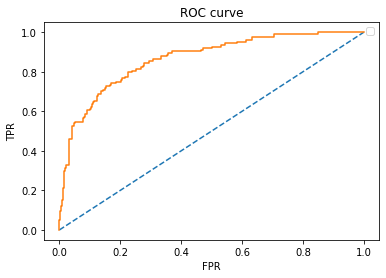

In [99]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [ ]:
#ROC=Reciever Operator Characteristics

In [100]:
from sklearn.metrics import roc_auc_score

AUC=roc_auc_score(y_train, probs)
AUC


0.8646439273752864

In [101]:
#prob >-.5, prob>0.25

In [102]:
##Q.If Probability score change then AUC will effected or not?
## Ans:AUC is not a function of Probability cut off it is a function of overall probability so AUC will not effected if model will change then only can be effected.

In [107]:
from joblib import dump
from joblib import load

In [108]:
dump(Log_output, "LogistciReg_on_bank.joblib")

['LogistciReg_on_bank.joblib']